<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Aula_28_CNN_numeros_23_dic_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
313/313 [==============================] - 4s 11ms/step


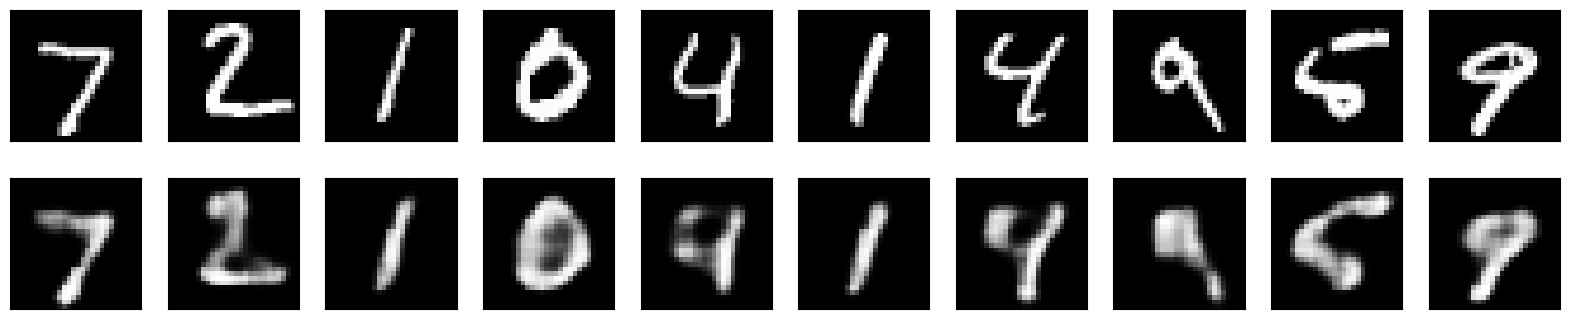

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist  # Solo para obtener datos de ejemplo
import cv2  # Importa la biblioteca OpenCV para cargar tu propia imagen

# Cargar datos de ejemplo (puedes sustituirlo por tu propia imagen)
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Añadir un canal para imágenes en escala de grises
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define la arquitectura de la red convolucional
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# En este punto, la representación de la imagen es codificada (tamaño reducido)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Ahora, se inicia la parte de decodificación
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

# Capa de salida, activación sigmoidal para imágenes en escala de grises
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Modelo de autoencoder convolucional
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Cargar tu propia imagen
ruta_imagen = '/content/drive/MyDrive/druida/numeros.jpg'  # Reemplaza con la ruta de tu propia imagen
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)  # Lee la imagen en escala de grises
imagen = cv2.resize(imagen, (28, 28))  # Ajustar el tamaño de la imagen a 28x28
imagen = imagen.astype('float32') / 255.0  # Normalizar la imagen
imagen = np.expand_dims(imagen, axis=-1)  # Expandir las dimensiones para que coincidan con el formato de entrada de la red

# Entrenar el autoencoder con tus datos o utilizar los datos de ejemplo
autoencoder.fit(x_train, x_train,
                epochs=1,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Obtener las imágenes reconstruidas
decoded_imgs = autoencoder.predict(x_test)

# Visualizar las imágenes originales y reconstruidas
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Mostrar imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
